In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/entity-annotated-corpus/ner.csv
/kaggle/input/entity-annotated-corpus/ner_dataset.csv


In [2]:
df=pd.read_csv('../input/entity-annotated-corpus/ner_dataset.csv',encoding='latin-1')

In [3]:
df.head(
)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
df['Tag'].unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [5]:
df['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [6]:
df['Sentence #'].nunique()-1

47958

In [7]:
from tqdm import tqdm

In [8]:
df['Sentence #'].fillna(value='previous',inplace=True)

In [9]:
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,previous,of,IN,O
2,previous,demonstrators,NNS,O
3,previous,have,VBP,O
4,previous,marched,VBN,O


In [10]:
curr_sent='Sentence: 1'
sentences=[]
tags_of_sentences=[]
sentence=[]
tags=[]
for i in tqdm(range(df.shape[0])):
    temp_sent=str(df.loc[i,'Sentence #'])
    if temp_sent == curr_sent or temp_sent=='previous':
        sentence.append(str(df.loc[i,'Word']))
        tags.append(str(df.loc[i,'Tag']))
    elif temp_sent!=curr_sent and temp_sent!='previous':
        curr_sent=str(df.loc[i,'Sentence #'])
        sentences.append(' '.join(sentence))
        tags_of_sentences.append(' '.join(tags))
        sentence=[]
        tags=[]
        sentence.append(str(df.loc[i,'Word']))
        tags.append(str(df.loc[i,'Tag']))
        
        
    
    

100%|██████████| 1048575/1048575 [01:29<00:00, 11655.28it/s]


In [11]:
sentences[1]

'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "'

In [12]:
tags_of_sentences[1]

'O O O O O O O O O O O O O O O O O O B-per O O O O O O O O O O O'

In [13]:
data=pd.DataFrame()

In [14]:
data['sentences']=sentences
data['tags']=tags_of_sentences

In [15]:
data.head()

,sentences,tags
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Families of soldiers killed in the conflict jo...,O O O O O O O O O O O O O O O O O O B-per O O ...
2,They marched from the Houses of Parliament to ...,O O O O O O O O O O O B-geo I-geo O
3,"Police put the number of marchers at 10,000 wh...",O O O O O O O O O O O O O O O
4,The protest comes on the eve of the annual con...,O O O O O O O O O O O B-geo O O B-org I-org O ...


In [16]:
data

,sentences,tags
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Families of soldiers killed in the conflict jo...,O O O O O O O O O O O O O O O O O O B-per O O ...
2,They marched from the Houses of Parliament to ...,O O O O O O O O O O O B-geo I-geo O
3,"Police put the number of marchers at 10,000 wh...",O O O O O O O O O O O O O O O
4,The protest comes on the eve of the annual con...,O O O O O O O O O O O B-geo O O B-org I-org O ...
...,...,...
47953,A U.S.-backed operation pushed the Taleban fro...,O O O O O B-org O O O B-tim O O O O O O O O O ...
47954,Indian border security forces are accusing the...,B-gpe O O O O O O B-gpe O O O O O O O O O B-ge...
47955,Indian officials said no one was injured in Sa...,B-gpe O O O O O O O B-tim O O O O O O O O O O ...
47956,Two more landed in fields belonging to a nearb...,O O O O O O O O O O O


In [17]:
from transformers import TFBertModel,BertTokenizer


In [18]:
tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

In [19]:
pre_model=TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [20]:
import seaborn as sn

100%|██████████| 47958/47958 [00:28<00:00, 1665.26it/s]


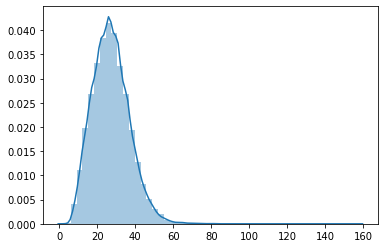

In [21]:
lens=[]
for i in tqdm(range(data.shape[0])):
    lens.append(len(['[CLS]']+tokenizer.tokenize(str(data.loc[i,'sentences']))+['[SEP]']))
sn.distplot(lens)

In [22]:
pd.Series(lens).describe()

count    47958.000000
mean        27.209663
std          9.604892
min          3.000000
25%         20.000000
50%         27.000000
75%         33.000000
max        156.000000
dtype: float64

In [23]:
max_len=156

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
tokenizer.tokenize('Raviteja')

['Ravi', '##te', '##ja']

In [26]:
np.char.not_equal('[PAD]',['KJBD','KJWDB','AWDJB']).astype(int)

array([1, 1, 1])

In [27]:
def get_bert_data(s,t,output_encoding,max_len):
    tokens=[]
    outputs=[]
    tags=t.split()
    for i,w in enumerate(s.split()):
        curr_toks=tokenizer.tokenize(w)
        j=0
        for tok in curr_toks:
            tokens.append(tok)
            j+=1
        for k in range(j):
            outputs.append(tags[i])
    if len(['[CLS]']+tokens+['[SEP]'])>max_len:
        req_len=max_len-2
        total_tokens=['[CLS]']+tokens[:req_len]+['[SEP]']
        total_outputs=['O']+outputs[:req_len]+['O']
    else:
        total_tokens=['[CLS]']+tokens+['[SEP]']+['[PAD]']*(max_len-len(tokens)-2)
        total_outputs=['O']+outputs+['O']+['O']*(max_len-len(tokens)-2)
    input_ids=tokenizer.convert_tokens_to_ids(total_tokens)
    attention_mask=np.char.not_equal('[PAD]',total_tokens).astype(int)
    token_type_ids=[]
    for tok in total_tokens:
        curr_seg=0
        if tok!='[SEP]':
            token_type_ids.append(curr_seg)
        else:
            token_type_ids.append(curr_seg)
            curr_seg=1-curr_seg
    total_outputs=list(output_encoding.get(t) for t in total_outputs)
    
    
    yield input_ids,attention_mask,token_type_ids,total_outputs

In [28]:
output_encoding=dict((t,i) for i,t in enumerate(list(df['Tag'].unique())))

In [29]:
output_encoding

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

In [30]:
from sklearn.model_selection import KFold

In [31]:
kf=KFold(n_splits=5)

In [32]:
x=data['sentences'].values
y=data['tags'].values

In [33]:
for train,test in kf.split(x,y):
    x_train,y_train,x_test,y_test=x[train],y[train],x[test],y[test]

In [34]:
input_ids=np.empty((x_train.shape[0],max_len),dtype='int32')
attention_mask=np.empty((x_train.shape[0],max_len),dtype='int32')
token_type_ids=np.empty((x_train.shape[0],max_len),dtype='int32')
Y=np.empty((x_train.shape[0],max_len,17),dtype='int32')
for i in tqdm(range(x_train.shape[0])):
    sent=x_train[i]
    tags=y_train[i]
    model_data=next(get_bert_data(sent,tags,output_encoding,max_len))
    input_ids[i,]=model_data[0]
    attention_mask[i,]=model_data[1]
    token_type_ids[i,]=model_data[2]
    Y[i,]=to_categorical(model_data[-1],num_classes=17)
model_inputs,model_outputs={'input_ids':input_ids,'attention_mask':attention_mask,'token_type_ids':token_type_ids},Y    

100%|██████████| 38367/38367 [01:10<00:00, 540.50it/s]


In [35]:

input_ids=np.empty((x_test.shape[0],max_len),dtype='int32')
attention_mask=np.empty((x_test.shape[0],max_len),dtype='int32')
token_type_ids=np.empty((x_test.shape[0],max_len),dtype='int32')
Y=np.empty((x_test.shape[0],max_len,17),dtype='int32')
for i in tqdm(range(x_test.shape[0])):
    try:
        sent=x_test[i]
        tags=y_test[i]
        model_data=next(get_bert_data(sent,tags,output_encoding,max_len))
        input_ids[i,]=model_data[0]
        attention_mask[i,]=model_data[1]
        token_type_ids[i,]=model_data[2]
        Y[i,]=to_categorical(model_data[-1],num_classes=17)
    except:
        print(i)
valid_inputs,valid_outputs={'input_ids':input_ids,'attention_mask':attention_mask,'token_type_ids':token_type_ids},Y    


 97%|█████████▋| 9326/9591 [00:16<00:00, 591.52it/s]

9224


100%|██████████| 9591/9591 [00:17<00:00, 559.07it/s]


In [36]:
x_test[9224]

'U.S. weather forecasters say Hurricane Wilma has strengthened to a powerful category 5\xa0storm and a key low-pressure measurement indicates it is the most powerful storm of the year .'

In [37]:
tags

'O O O O O O O O O O O'

In [38]:
tokens=[]
outputs=[]
tags=y_test[9224].split()
for i,w in enumerate(x_test[9224].split()):
    curr_toks=tokenizer.tokenize(w)
    j=0
    for tok in curr_toks:
        tokens.append(tok)
        j+=1
    try:
        for k in range(j):
            outputs.append(tags[i])
    except:
        print(i)

29


In [39]:
#y_test[9224].split()[29]

for this text at the end '.' doesnot have tag. So, Imanually added it.

In [40]:
(y_test[9224]+' O').split()[29]

'O'

In [41]:
y_test[9224]=y_test[9224]+' O'

In [42]:

input_ids=np.empty((x_test.shape[0],max_len),dtype='int32')
attention_mask=np.empty((x_test.shape[0],max_len),dtype='int32')
token_type_ids=np.empty((x_test.shape[0],max_len),dtype='int32')
Y=np.empty((x_test.shape[0],max_len,17),dtype='int32')
for i in tqdm(range(x_test.shape[0])):
    try:
        sent=x_test[i]
        tags=y_test[i]
        model_data=next(get_bert_data(sent,tags,output_encoding,max_len))
        input_ids[i,]=model_data[0]
        attention_mask[i,]=model_data[1]
        token_type_ids[i,]=model_data[2]
        Y[i,]=to_categorical(model_data[-1],num_classes=17)
    except:
        print(i)
valid_inputs,valid_outputs={'input_ids':input_ids,'attention_mask':attention_mask,'token_type_ids':token_type_ids},Y    


100%|██████████| 9591/9591 [00:17<00:00, 535.72it/s]


In [43]:
model_inputs,model_outputs

({'input_ids': array([[  101, 26159,  1104, ...,     0,     0,     0],
         [  101, 21860,  1104, ...,     0,     0,     0],
         [  101,  1220,  9639, ...,     0,     0,     0],
         ...,
         [  101,  1828,   119, ...,     0,     0,     0],
         [  101,  5096, 27727, ...,     0,     0,     0],
         [  101,  1828,   119, ...,     0,     0,     0]], dtype=int32),
  'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]], dtype=int32),
  'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32)},
 array([[[1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
     

all done!

In [44]:
valid_inputs,valid_outputs

({'input_ids': array([[ 101, 1130,  170, ...,    0,    0,    0],
         [ 101, 1109,  158, ...,    0,    0,    0],
         [ 101, 9651, 1764, ...,    0,    0,    0],
         ...,
         [ 101, 1890, 3878, ...,    0,    0,    0],
         [ 101, 1960, 1167, ...,    0,    0,    0],
         [ 101, 1220, 1474, ...,    0,    0,    0]], dtype=int32),
  'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]], dtype=int32),
  'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32)},
 array([[[1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 

model building

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Dropout
import tensorflow as tf

In [46]:
ins1=Input((156,),dtype='int32')
ins2=Input((156,),dtype='int32')
ins3=Input((156,),dtype='int32')
pre_layer,_=pre_model({'input_ids':ins1,'attention_mask':ins2,'token_type_ids':ins3})
outs=Dense(17,activation='softmax')(pre_layer)
model=Model(inputs={'input_ids':ins1,'attention_mask':ins2,'token_type_ids':ins3},outputs=outs)

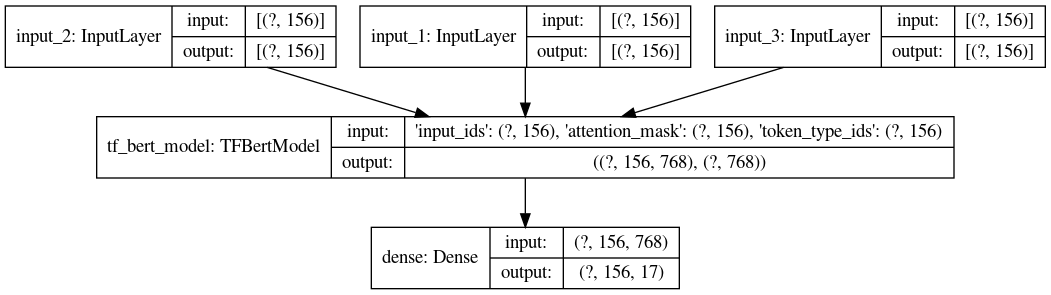

In [47]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),loss='categorical_crossentropy',metrics=['accuracy'])
saving=tf.keras.callbacks.ModelCheckpoint(monitor='val_loss',mode='min',save_weights_only=True,save_freq='epoch',verbose=1,
                                         filepath='bert_model.h5',save_best_only=True)
model.fit(model_inputs,y=model_outputs,validation_data=(valid_inputs,valid_outputs),
         epochs=3,batch_size=32,validation_batch_size=16,callbacks=[saving])

Epoch 1/3
1199/1199 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9883
Epoch 00001: val_loss improved from inf to 0.02125, saving model to bert_model.h5
1199/1199 [==============================] - 788s 657ms/step - loss: 0.0437 - accuracy: 0.9883 - val_loss: 0.0213 - val_accuracy: 0.9934
Epoch 2/3
1199/1199 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9938
Epoch 00002: val_loss improved from 0.02125 to 0.01961, saving model to bert_model.h5
1199/1199 [==============================] - 785s 655ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0196 - val_accuracy: 0.9936
Epoch 3/3
1199/1199 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9949
Epoch 00003: val_loss improved from 0.01961 to 0.01935, saving model to bert_model.h5
1199/1199 [==============================] - 786s 656ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0193 - val_accuracy: 0.9939


In [49]:
model.evaluate(valid_inputs,valid_outputs)

300/300 [==============================] - 63s 211ms/step - loss: 0.0193 - accuracy: 0.9939


[0.01934986189007759, 0.9938805103302002]

inference

In [60]:
ids=np.expand_dims(valid_inputs.get('input_ids')[0],axis=0)
mask=np.expand_dims(valid_inputs.get('attention_mask')[0],axis=0)
type_ids=np.expand_dims(valid_inputs.get('token_type_ids')[0],axis=0)

In [57]:
target=valid_outputs[0,]

In [62]:
output=model.predict({'input_ids':ids,'attention_mask':mask,'token_type_ids':type_ids})

In [65]:
output=output[0,]

predicted values

In [66]:
np.argmax(output,axis=-1)

array([ 0,  0,  0,  0,  0,  2,  3, 10, 10, 10, 10, 10, 10,  0,  0,  5,  6,
        6,  6,  6,  6,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

real values

In [81]:
real=np.empty((156,))
for i in range(target.shape[0]):
    w_tag=np.nonzero(target[i,])[0][0]
    real[i,]=w_tag
print(real)

[ 0.  0.  0.  0.  0.  2.  3. 10. 10. 10. 10. 10. 10.  0.  0.  5.  6.  6.
  6.  6.  6.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


those corresponding number belongs to::
{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}